In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("../Oblig2/winequality-red.csv", delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='quality'>

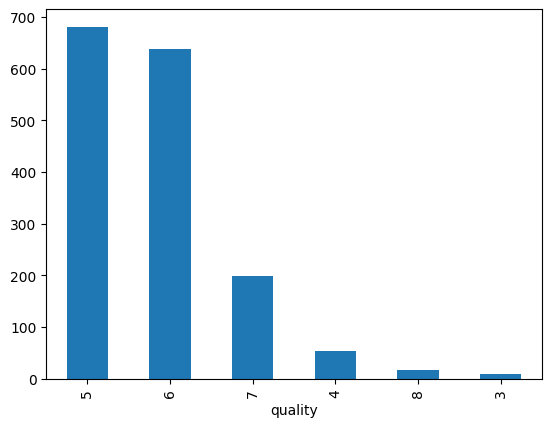

In [13]:
df['quality'].value_counts().plot.bar()

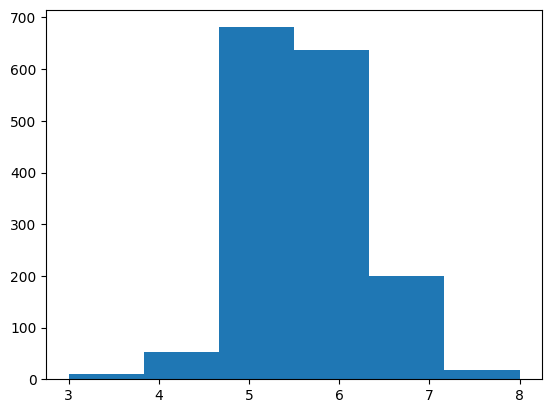

In [11]:
plt.hist(df["quality"], bins=6)
plt.show()

husk å sjekk om det er hensiktsmessig å upsample????

In [17]:
df_features = df.drop('quality', axis=1)
df_features.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


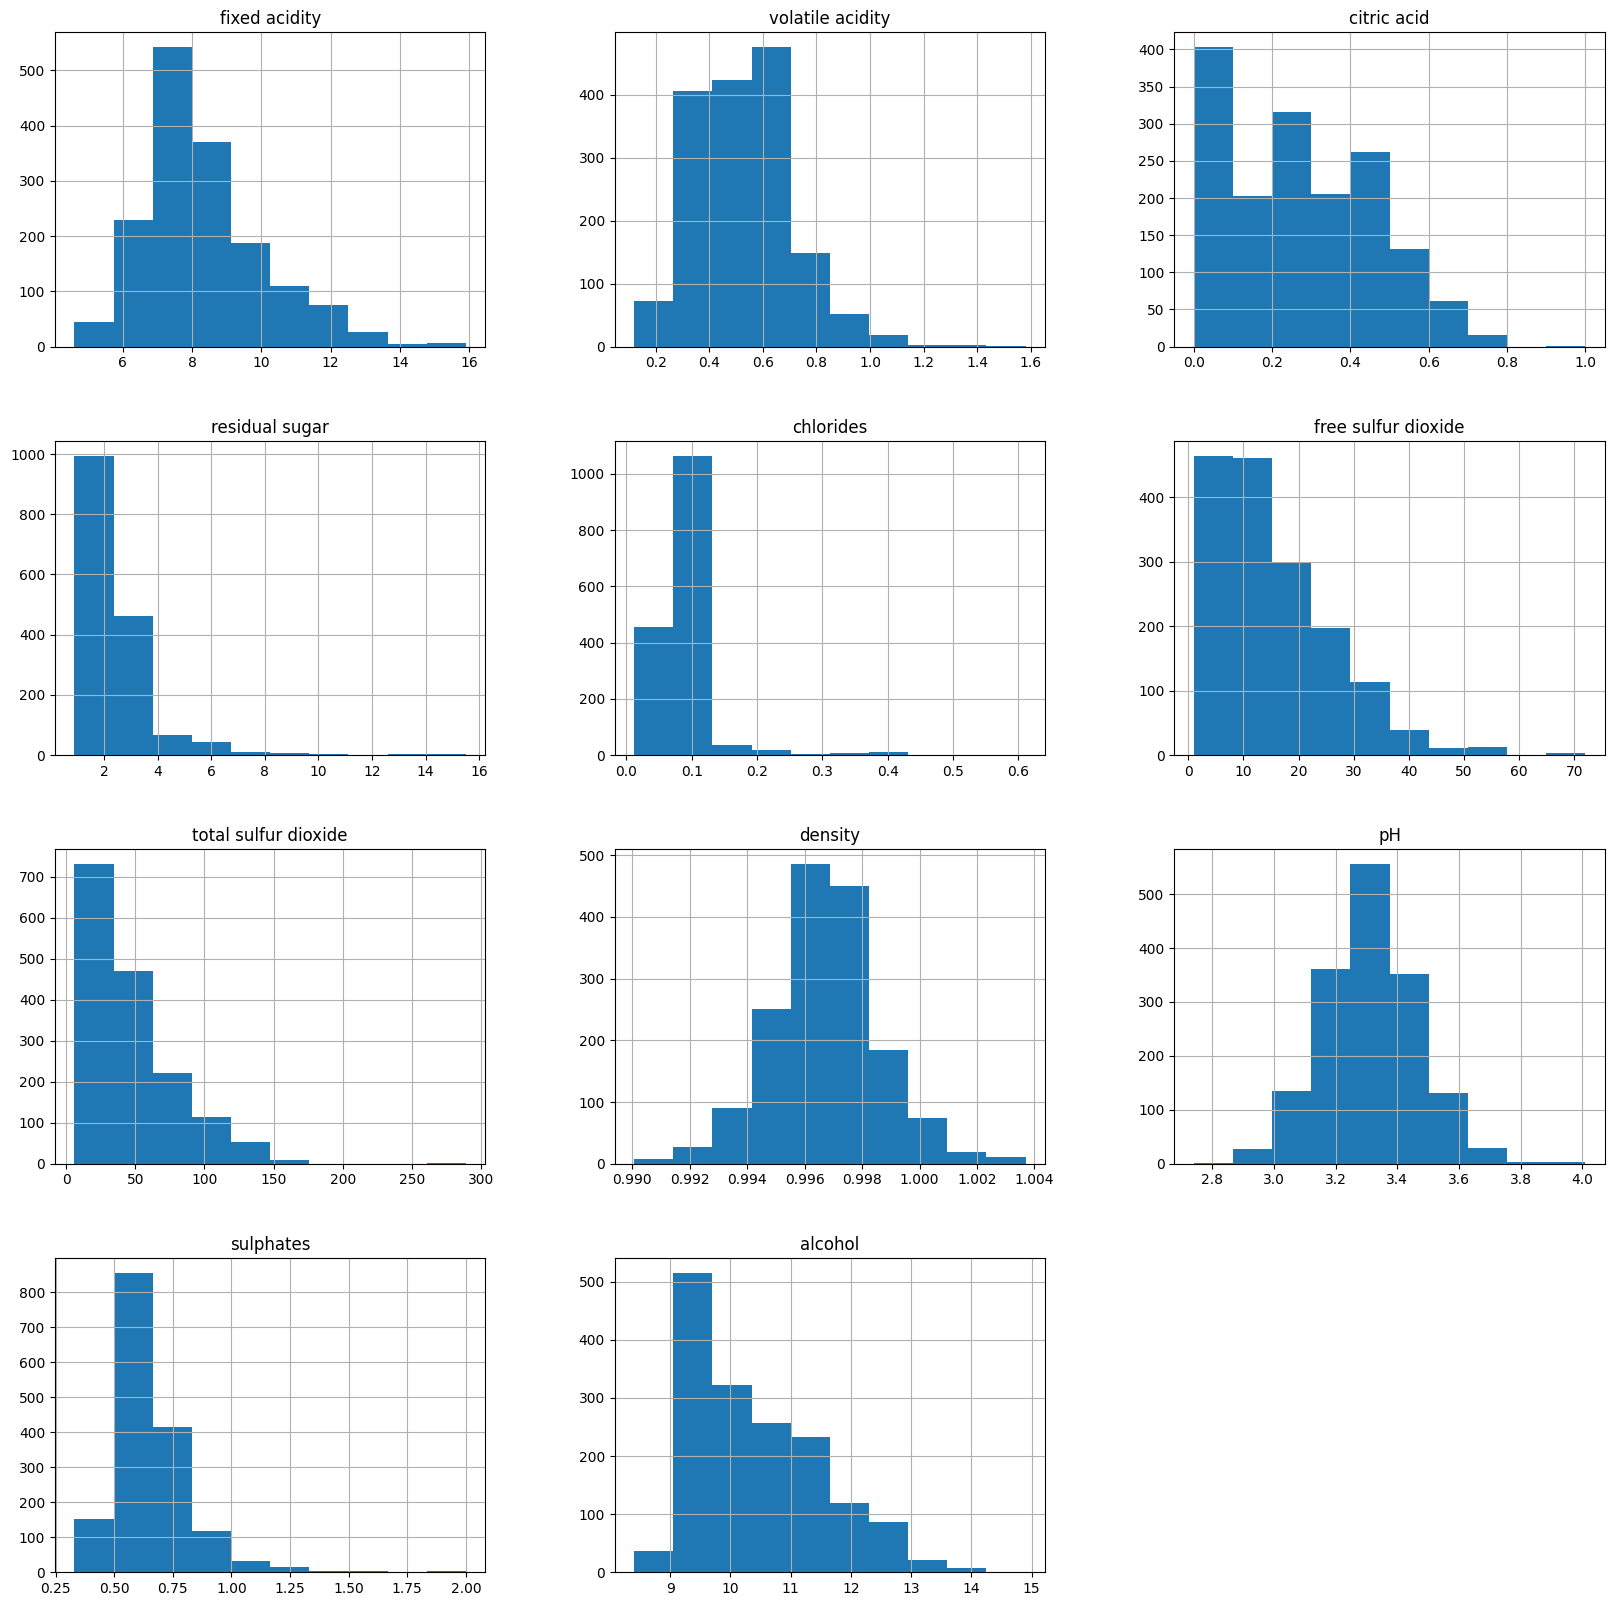

In [21]:
df_features.hist(figsize=(20,20))
plt.show()

all data ser ut til å være normalfordel eller en sidig normalfordelt

In [34]:
corr_matrix = df_features.corr()
corr_matrix.style.background_gradient(cmap='RdBu')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595


ingen punkter som har en en corr over 0.7 eller -0.7 velger derfor å ikke gjøre noe i utgangspunktet.

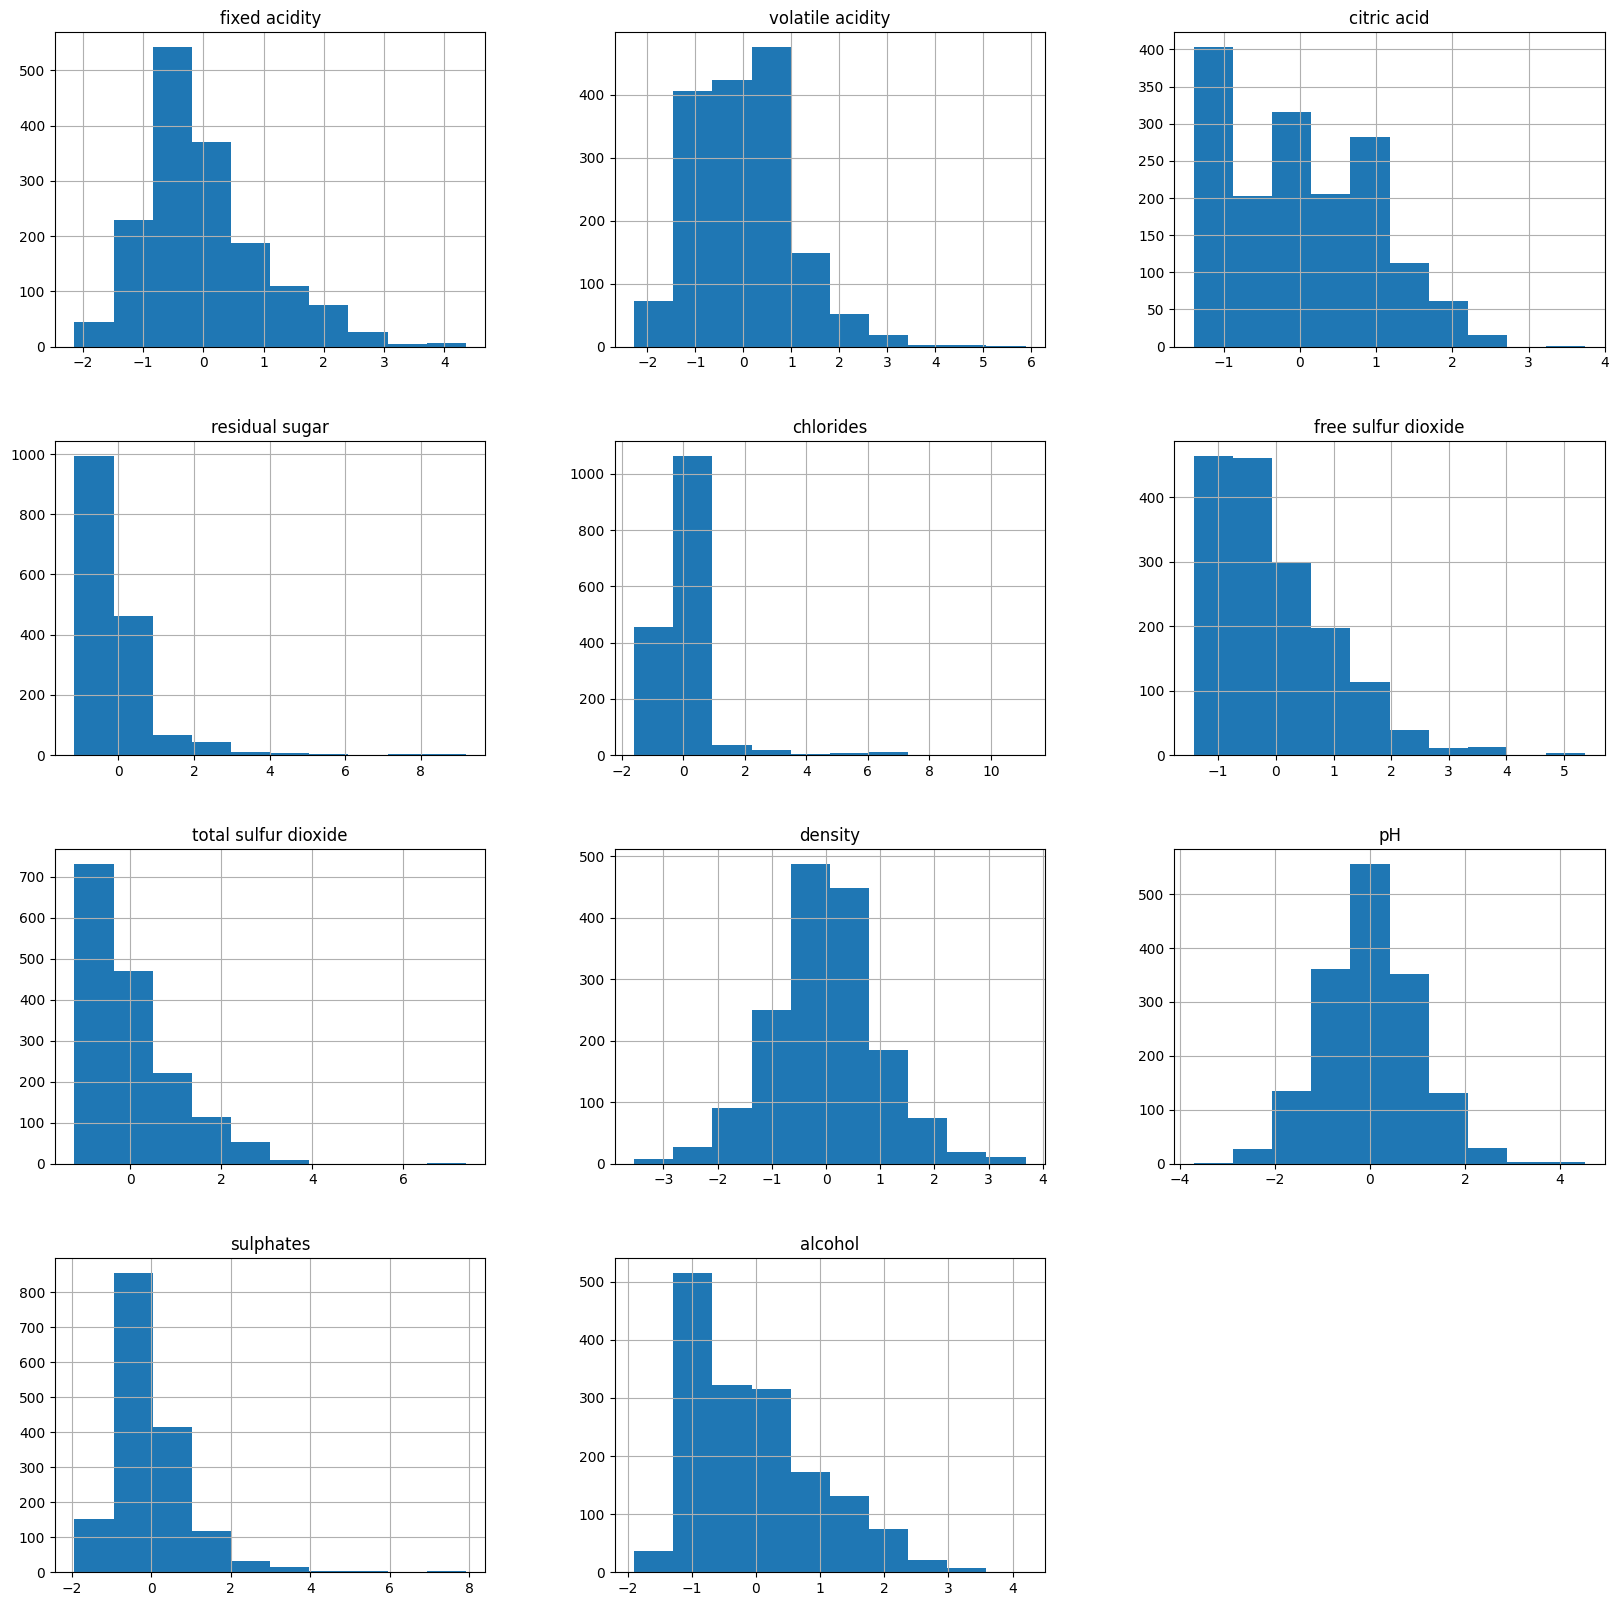

In [28]:
df_features = pd.DataFrame(StandardScaler().fit_transform(df_features), columns=df_features.columns)
df_features.hist(figsize=(20,20))
plt.show()

Hensiktsmessig med normalisering pga. stor forskjellig x verdier
valg å bruke.....
som vi ser av resutlat så er----

husk å kjør enkel sammenlignings test......

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.599000e+03,1.599000e+03,1.599000e+03,1.599000e+03,1599.000000,1599.000000,1.599000e+03,1599.000000,1.599000e+03,1.599000e+03,1599.000000
mean,1.777468e-17,-8.887339e-18,-1.777468e-17,-8.887339e-18,0.000000,0.000000,1.777468e-17,0.000000,-1.777468e-17,8.887339e-18,0.000000
std,1.000313e+00,1.000313e+00,1.000313e+00,1.000313e+00,1.000313,1.000313,1.000313e+00,1.000313,1.000313e+00,1.000313e+00,1.000313
min,-2.137045e+00,-2.278280e+00,-1.391472e+00,-1.162696e+00,-1.603945,-1.422500,-1.230584e+00,-3.538731,-3.700401e+00,-1.936507e+00,-1.898919
25%,-7.007187e-01,-7.699311e-01,-9.293181e-01,-4.532184e-01,-0.371229,-0.848716,-7.440403e-01,-0.607756,-6.551405e-01,-6.382196e-01,-0.866379
50%,-2.410944e-01,-4.368911e-02,-5.636026e-02,-2.403750e-01,-0.179946,-0.179300,-2.574968e-01,0.001760,-7.212705e-03,-2.251281e-01,-0.209308
75%,5.057952e-01,6.266881e-01,7.652471e-01,4.341614e-02,0.053845,0.490115,4.723184e-01,0.576825,5.759223e-01,4.240158e-01,0.635497
max,4.355149e+00,5.877976e+00,3.743574e+00,9.195681e+00,11.127035,5.367284,7.375154e+00,3.680055,4.528282e+00,7.918677e+00,4.202453
